Saving 9. Customer Segmentation in E-commerce.csv to 9. Customer Segmentation in E-commerce.csv


<ipython-input-2-60b938d766b0>:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


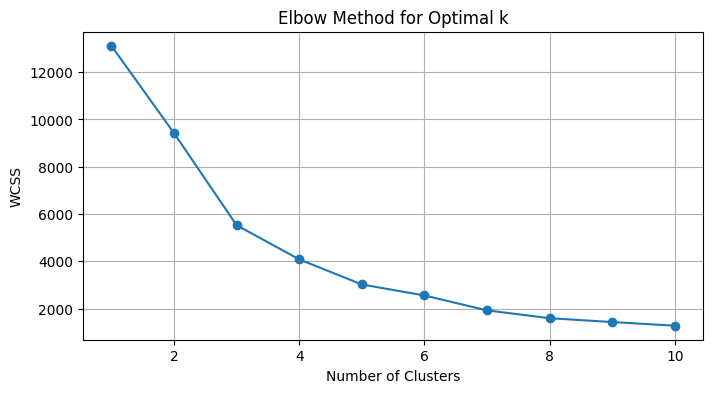

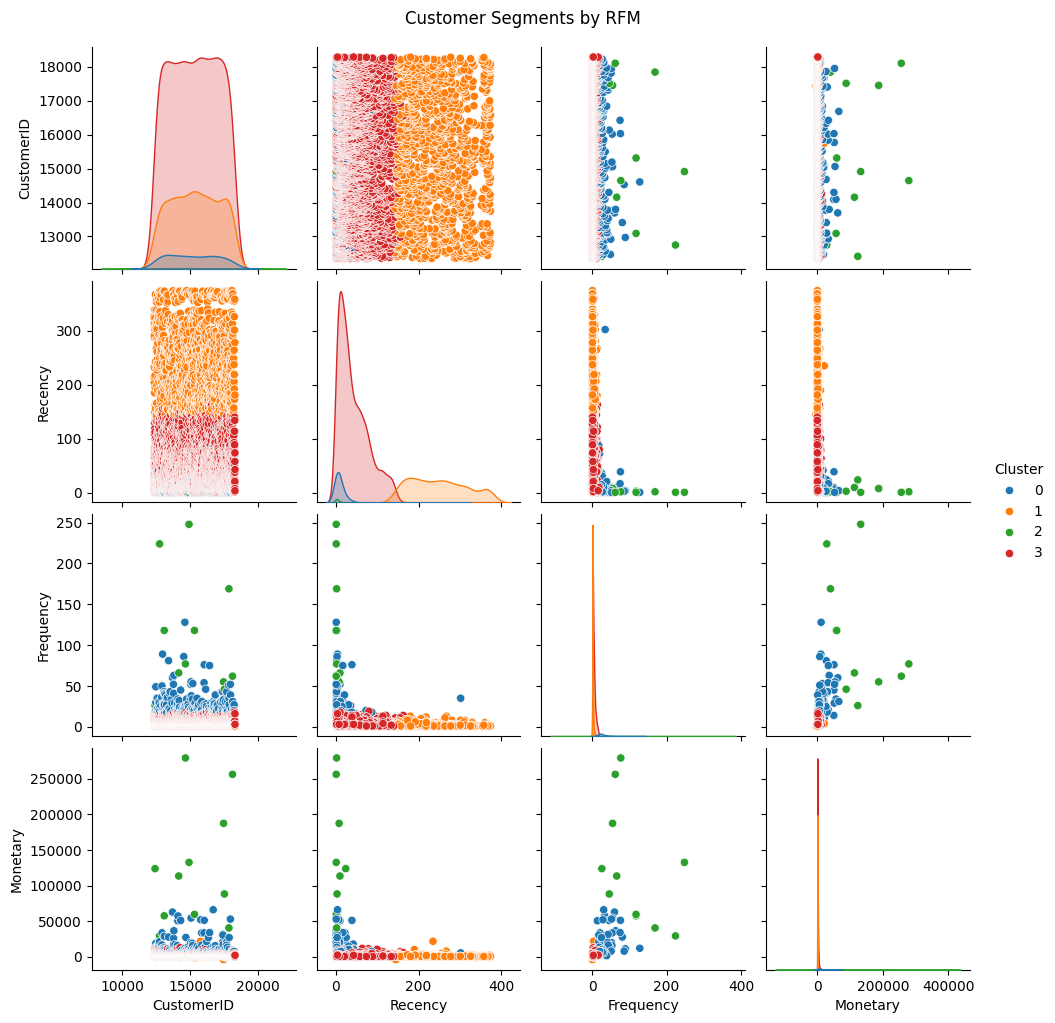

,CustomerID,Recency,Frequency,Monetary,Cluster
4305,18198.0,4,21,5083.06,0
1268,14051.0,1,26,15477.34,0
1273,14056.0,1,29,8124.40,0
1274,14057.0,24,18,6147.40,0
1276,14060.0,5,20,6135.38,0


In [2]:
# Step 1: Upload the CSV file
from google.colab import files
uploaded = files.upload()

# Step 2: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Read the uploaded file (replace with actual file name if needed)
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Step 4: Data Cleaning
df.dropna(subset=['CustomerID'], inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Step 5: Create RFM (Recency, Frequency, Monetary) table
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                       # Monetary
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Step 6: Normalize RFM features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Step 7: Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Step 8: Apply KMeans (choose k=4 for example)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Step 9: Visualize Clusters
sns.pairplot(rfm, hue='Cluster', palette='tab10', diag_kind='kde')
plt.suptitle("Customer Segments by RFM", y=1.02)
plt.show()

# Optional: Display RFM table with clusters
rfm.sort_values('Cluster').head()
